In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform
#import SIRD_Model_Experimental
import SIRD_Model
from sklearn import linear_model


### JHU Data
### https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [28]:
class CovidTimeSeries(object):
    """ Stores the JHU time series data for a county for covid """
    def __init__(self):
        self.UID= None
        self.iso2=None
        self.iso3=None
        self.code3=None
        self.FIPS=None
        self.Admin2=None
        self.Province_State=None
        self.Country_Region=None
        self.Lat=None
        self.Long=None
        self.Combined_Key=None
        self.Population=None
        self.infections=None
        self.deaths=None
        
        
 
class CovidDatabase(object):
    """ Stores the covid-19 data"""
    def __init__(self):
        self.CovidData={}
        self.DateRange=[]
      
    def loadTimeSeries(self, filenameI, filenameD, startdate, enddate):
        """ load the infections data from filenameI and death data from filenameD
            from startdate to enddate
        """
        csvfile=open(filenameI, newline='')
        rd = csv.reader(csvfile, delimiter=',')
        data=[]
        for lv in rd:
                data.append(lv)

        header=data[0]
        infectionData=data[1:]

        csvfiled=open(filenameD, newline='')
        rd = csv.reader(csvfiled, delimiter=',')
        datad=[]
        for lv in rd:
                datad.append(lv)

        headerd=datad[0]
        deathData=datad[1:]

        startdate_index=header.index(startdate)
        enddate_index=header.index(enddate)
        startdate_indexd=headerd.index(startdate)
        enddate_indexd=headerd.index(enddate)

        CountyD={}
        N=len(infectionData);
        for i in range(N):
            pop1=int(deathData[i][11])
            if (pop1>0):
                c1=CovidTimeSeries()
                c1.Population=pop1
                c1.UID= infectionData[i][0]
                c1.iso2=infectionData[i][1]
                c1.iso3=infectionData[i][2]
                c1.code3=infectionData[i][3]
                fp=infectionData[i][4]
                if (fp==''):
                    x=-1
                else:
                    x=int(float(fp))
                c1.FIPS=x
                c1.Admin2=infectionData[i][5]
                c1.Province_State=infectionData[i][6]
                c1.Country_Region=infectionData[i][7]
                c1.Lat=float(infectionData[i][8])
                c1.Long=float(infectionData[i][9])
                c1.Combined_Key=infectionData[i][10]
                c1.infections=np.array([float(a) for a  in infectionData[i][startdate_index:enddate_index+1]])
                c1.deaths=np.array([float(a) for a  in deathData[i][startdate_indexd:enddate_indexd+1]])
                CountyD[x]=c1
        self.DateRange=header[startdate_index:enddate_index+1]
        self.CovidData=CountyD


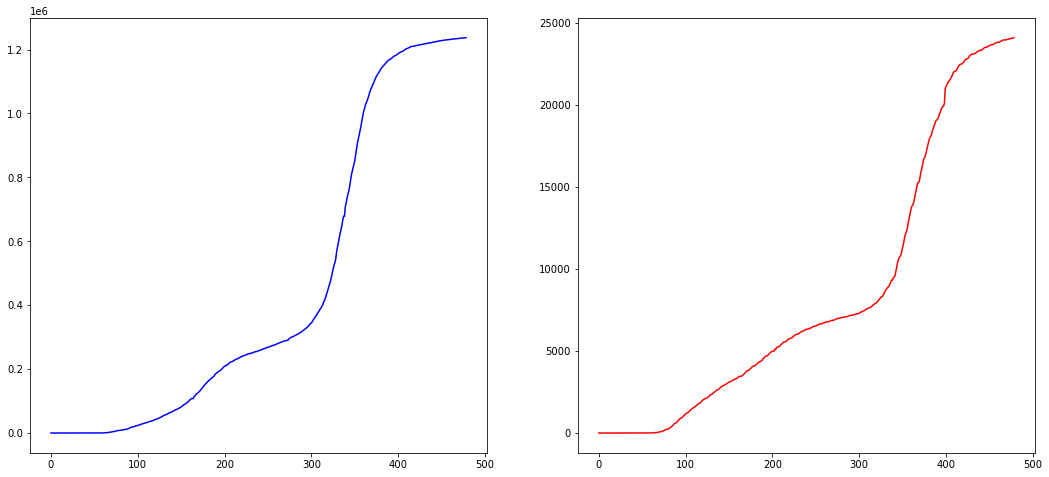

In [25]:
k1=6037 #LA county
i1=database.CovidData[k1].infections
d1=database.CovidData[k1].deaths

fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(i1, color='blue', label='infections')
ax2[1].plot(d1, color='red', label='deaths')
